<font style="font-family:roboto;color:#455e6c;font-size:18px;text-align:justify"> <b> Analysis with CompositionSpace <br> </b> </font>

This is a tutorial on how to use CompositionSpace and pyiron for processing a dataset. [The dataset](https://doi.org/10.1017/S1431927618015386) is an ODS steel with Y-containing titanium oxide dispersoids which was characterized by J. Wang and coworkers.

Imports:

In [1]:
from pyiron_base import Project
from apt_jobs.compositionspacejob import CompositionSpace

Create a Project, which is the central object in pyiron

In [2]:
pr = Project("compspace")

### Pre-processing stage

* Reading the reconstruction data (spatial coordintes of ions)(.APT, .POS, .csv)
* Reading range file (.rrng)
* concacting chemical species to each ion using the mass to charge ratio ranges from the range file(.rrng).
* Spatially discretize the reconstructed data into slices. (Especially useful if the original data is very large)
* Voxelize each slice
* Calculate the composition of each voxel( in atomic fraction)

In [3]:
job = pr.create_job(job_type=CompositionSpace, job_name="t1", 
                    delete_existing_job=True)

In [4]:
job.input

DataContainer({'input_path': None, 'n_big_slices': 10, 'voxel_size': 2, 'bics_clusters': 10, 'n_phases': 2, 'ml_models': DataContainer({'name': 'GaussianMixture', 'GaussianMixture': DataContainer({'n_components': 2, 'max_iter': 100000, 'verbose': 0}), 'RandomForest': DataContainer({'max_depth': 0, 'n_estimators': 0}), 'DBScan': DataContainer({'eps': 3, 'min_samples': 5})}), 'analysis': None, 'fileindex': 0, 'cluster_id': 0, 'plot': False, 'plot3d': False})

Specify where the data is stored

In [ ]:
job.input.input_path = "data"

### Analysis and post-processing

The next steps allows to select the analysis:

* Calculate contribution of each species towards variance in composition (using PCA)(Also helps to guage importance of a certain chemical species in the data)
* For a certain clustering algorithm perform minimisation of BIC and AIC (to guage model complexity vs information) (to get the optimum number of clusters)
* Use Gaussian mixture models (GMM) to perform clustering in composition space with the number of clusters from the previous step. 

In the post-processing stage:

* Clean the precipitates/chemical domains of diffrent phases from the noisy voxels
* Segment out each precipitate in 3D 

In [6]:
job.analyse_PCA_cumsum()
job.analyse_bics_minimization()
job.analyse_dbscan_clustering()

The job t1 was saved and received the ID: 1


Reading files:   0%|          | 0/2 [00:00<?, ?it/s]

Creating chunks:   0%|          | 0/10 [00:00<?, ?it/s]

Getting Voxels:   0%|          | 0/10 [00:00<?, ?it/s]

Calculating voxel composition:   0%|          | 0/23259 [00:00<?, ?it/s]

23259
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 'Total_no', 'vox']


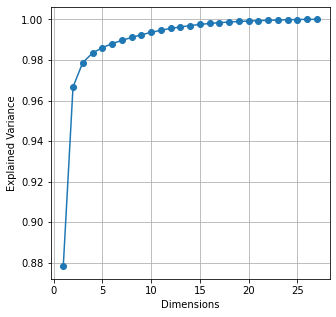

Clustering:   0%|          | 0/9 [00:00<?, ?it/s]

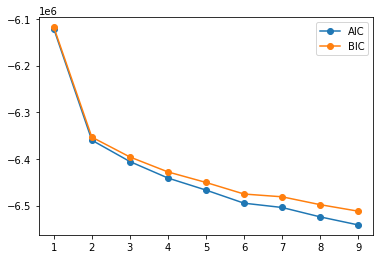

  0%|          | 0/86 [00:00<?, ?it/s]

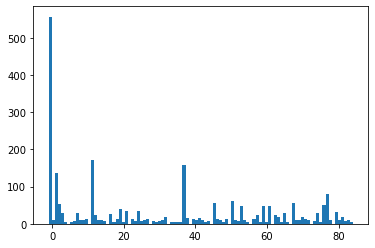

In [7]:
job.run()

In [ ]:
job.plot3d()

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyvista/plotting/plotting.py:148: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(
